# Hola Jefferson!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
- Primero es importar las librerías necesarias para abordar lo que se solicita. En este caso, pandas, numpy y matplotlib
- Luego, revisar la data en archivo csv. En este caso, están separados por ; y no por default con ,. Es por ese motivo que al usar la función read_csv() se aplicará el parámetro sep=';'.
- Por último, tener una revisión general de los objetos con el método .info() para cada Dataframe.

In [18]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames

df_instacart_orders=pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products=pd.read_csv('/datasets/products.csv', sep=';')
df_aisles=pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments=pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products=pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [4]:
# mostrar información del DataFrame

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame

df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [6]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
- Contamos con diferentes data frame que se pueden relacionar para obtener información general por medio de sus columnas. como es el caso de 'product_id' y de 'order_id'.
- También, se puede apreciar los tipos de datos: int64, float64 y objetos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
- Verificamos en cada DataFrame:
    - Cuenta con duplicados explícitos
    - Cuenta con valores ausentes. En caso de columnas que tengas valores categóricos, verificar si se tienen que rellenar con un string 'desconocido'. En el caso, de encontrarse columnas con valores numéricos, verificar de llenarlos con la media o la mediana, dependiendo si sus valores se encuentran dispersos o no. También, se debe verificar si podrían eliminarse o no las filas que contengan estos valores ausentes

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders.duplicated().sum())
df_instacart_orders[df_instacart_orders.duplicated(keep=False)]

15


order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3                  2   
257934   1919531   191501            32          3                  2   
259636   2282673    86751            49          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
314427   1286742   183220            48          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
324868   2232988    82565             1          3                  2   
345917   2232988    82565             1          3                  2   
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3                  2   
415163   2282673    86751            49          3                  2   
441599   2125197    14050            48          3                  2   

        days_since_prior_order  
30371                     16.0  
99462                      2.0  
119251                    18.0  
142258                     7.0  
145574                     2.0  
164581                     6.0  
200059                     NaN  
204042                     3.0  
215294                    30.0  
223105                    30.0  
230807                    16.0  
242618                     9.0  
250626                     2.0  
257934                     7.0  
259636                     2.0  
266232                     NaN  
273805                     6.0  
284038                     7.0  
311713                     9.0  
314427                     4.0  
321100                    18.0  
323900                     7.0  
324868                     NaN  
345917                     NaN  
354993                    10.0  
371905                    10.0  
394347                     2.0  
411408                     4.0  
415163                     2.0  
441599                     3.0

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Si cuentan con 15 líneas duplicadas. Tienen en común que pertenecen al día miércoles y se da a las 2 am.

In [9]:
# Basándote en tus hallazgos, se encontraron 15 líneas con valores duplicados explícitos.
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

df_miercoles_2am=df_instacart_orders[(df_instacart_orders['order_hour_of_day']==2)&(df_instacart_orders['order_dow']==3)] # Se filtran que en la columna 'order_hour_of_day' corresponda a las 2 am y en la columna 'order_dow' sea el día miércoles (3)
df_miercoles_2am[df_miercoles_2am.duplicated(keep=False)] # Se identifica y muestra los duplicados en el dataframe filtrado.

order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3                  2   
257934   1919531   191501            32          3                  2   
259636   2282673    86751            49          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
314427   1286742   183220            48          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
324868   2232988    82565             1          3                  2   
345917   2232988    82565             1          3                  2   
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3                  2   
415163   2282673    86751            49          3                  2   
441599   2125197    14050            48          3                  2   

        days_since_prior_order  
30371                     16.0  
99462                      2.0  
119251                    18.0  
142258                     7.0  
145574                     2.0  
164581                     6.0  
200059                     NaN  
204042                     3.0  
215294                    30.0  
223105                    30.0  
230807                    16.0  
242618                     9.0  
250626                     2.0  
257934                     7.0  
259636                     2.0  
266232                     NaN  
273805                     6.0  
284038                     7.0  
311713                     9.0  
314427                     4.0  
321100                    18.0  
323900                     7.0  
324868                     NaN  
345917                     NaN  
354993                    10.0  
371905                    10.0  
394347                     2.0  
411408                     4.0  
415163                     2.0  
441599                     3.0

¿Qué sugiere este resultado? Este resultado sugiere que los valores explícitos han sido identificados y se necesita eliminarlo porque no son necesarios para el análisis.

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders.drop_duplicates(inplace=True) # Se eliminan los duplicados explícitos en el mismo dataframe
df_instacart_orders.reset_index(drop=True, inplace=True) # se resetean en el mismo dataframe los índices eliminando la columna anterior.

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos

df_instacart_orders[df_instacart_orders.duplicated(subset=['order_id'])]

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Describe brevemente tus hallazgos y lo que hiciste con ellos
- Se identificiaron las 15 filas duplicadas y se eliminaron por no ser relevantes. Además, se verificó si se cumplió la eliminación y se comprobó que ya no existen duplicados en el dataframe usado.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

df_products.duplicated().sum()

0

In [14]:
# Verifica si hay IDs duplicadas de productos

df_products[df_products.duplicated(subset='product_id')]

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products['product_name']=df_products['product_name'].str.upper() # Primero se convienten a mayúsculas los nombres de los productos sobreescribiendolos en su misma columna.

df_products[df_products.duplicated(subset='product_name', keep=False)] # Se analizan y se muestran los duplicados en la columna 'product_name'


product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  BIOTIN 1000 MCG        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       FRESH SCENT DISHWASHER DETERGENT WITH DAWN        74   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
37                21  
41                11  
71                21  
109               21  
185               17  
...              ...  
49689              7  
49690             14  
49691             14  
49692             11  
49693              1  

[1465 rows x 4 columns]

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

# - Se filtran los valores no nulos en la columna 'product_name' junto con los valores duplicados en la misma columna y usando el parámetro keep=false para mostrarlos.
df_products[(df_products['product_name'].notna())&(df_products.duplicated(subset='product_name', keep=False))]


product_id                                     product_name  aisle_id  \
41             42                                  BIOTIN 1000 MCG        47   
185           186       FRESH SCENT DISHWASHER DETERGENT WITH DAWN        74   
515           516                           AMERICAN CHEESE SLICES        21   
1538         1539                                 CAULIFLOWER HEAD        83   
1783         1784              NUTRITION PROTEIN MIX BLUEBERRY NUT       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
41                11  
185               17  
515               16  
1538               4  
1783              19  
...              ...  
49689              7  
49690             14  
49691             14  
49692             11  
49693              1  

[207 rows x 4 columns]

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Se ha encontrado que si existen nombres de productos que se duplican. Se filtró los productos no faltantes.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas

df_departments.duplicated().sum()

0

In [18]:
# Revisa si hay IDs duplicadas de productos

df_departments[df_departments.duplicated(subset='department_id', keep=False)] # se verifica y muestra si existen duplicados por id de departamento.

Empty DataFrame
Columns: [department_id, department]
Index: []

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Se identificó que no exiten duplicados explícitos en el dataframe de departamentos

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

df_aisles.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos

df_aisles[df_aisles.duplicated(subset='aisle_id', keep=False)] # se verifica y muestra si existen duplicados por id de pasillo

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No se encontraron duplicados en el dataframe df_aisles

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

df_order_products.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

df_order_products[df_order_products.duplicated(subset=['order_id','product_id'], keep=False)]


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No se ha identificado filas con duplicados explícitos y también en las columnas order_id y product_id

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Describe brevemente cuáles son tus hallazgos.
- Se identifica qu existen 1258 valores ausentes solo en la columna 'product_name' y en las otras no.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

df_products[(df_products['product_name'].isna())&(df_products['aisle_id']==100)]

product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

Describe brevemente cuáles son tus hallazgos.
- Así es. Todos los valores ausentes están relacionados con el ID del pasillo 100, ya que en total se encontraron 1258 valores ausentes.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

df_products.query('product_name.isna() and department_id == 21')

product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

Describe brevemente cuáles son tus hallazgos.
- Se comprueba que todos los nombre de los productos ausentes están relacionados con el id de departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

departamen_id_21=df_departments[df_departments['department_id']==21]

aisle_id_100=df_aisles[df_aisles['aisle_id']==100]

print(departamen_id_21)
print(aisle_id_100)


    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
- De acuerdo con lo observado, no se encuentra información del nombre del departamento y del posillo para los casos de aisle_id =100 y departament_id=21, ya que marca como ausente.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name']=df_products['product_name'].fillna('Unknown')

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Se rellenaron los 1258 valores ausenten en la columna nombre de producto con el string 'Unknown'

### `orders` data frame

In [28]:
# Encuentra los valores ausentes

df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

df_instacart_orders.query("order_number != 1 and days_since_prior_order.isnull()")

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- De acuerdo con lo observado, se nota la presencia de 28817 valores ausentes en la columna days_since_prior_orer y también que todos los valores ausentes corresponden al primer pedido del cliente.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes

df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

max_valor=df_order_products['add_to_cart_order'].max()
min_valor=df_order_products['add_to_cart_order'].min()

print(max_valor)
print(min_valor)

64.0
1.0


Describe brevemente cuáles son tus hallazgos.
- Esto nos indica que existen valores ausentes en la columna donde se ve el orden secuencial en el que se añadió cada artículo en el carrito y donde oscila entre 1 a 64.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_id_null=df_order_products.query("add_to_cart_order.isnull()")['order_id']

print(order_id_null)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

df_order_products.query("add_to_cart_order.isnull()").groupby('order_id')['product_id'].count().sort_values(ascending=False).tail(10)

order_id
180546     2
2621907    1
2652650    1
2170451    1
2729254    1
888470     1
1598369    1
747668     1
1677118    1
9310       1
Name: product_id, dtype: int64

Describe brevemente cuáles son tus hallazgos.
- Se encuentra que dentro de las filas con valores nulos, son nueve ID de pedido con un id de producto.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products=df_order_products.fillna(999)

np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int')) # esto nos indica que no hay problema para convertir de float a int

df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype('int') # convertimos a int sin tener problema de no borrar alguna información de decimal.

print(df_order_products['add_to_cart_order'])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Se comprobó que al realizar el cambio de tipo de variable de float a int no habría inconveniente de omitir alguna información, por lo que se realizó el cambio sin novedades.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos.
- Se realizó el precosamiento de todos los dataframe. Primero revisamos si existían duplicados explícitos y también comprobamos los duplicados implícitos entre las columnas del dataframe. Luego se eliminaron los duplicados explícitos porque no son nesarios y los duplicados implícitos se analizaron. Después, se analizaron los valores ausentes presentes en los dataframe donde se completaron las variables categóricas con el valor 'Unknow' y las variables numérica con un valor int.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
df_instacart_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [36]:
df_instacart_orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

Escribe aquí tus conclusiones
- Se comprueba que los valores de las ordenes del día oscilan entre 0 y 23 horas. Por otro lado, en la columna se comprueba que los valores del día de semana oscilan entre 0 y 6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

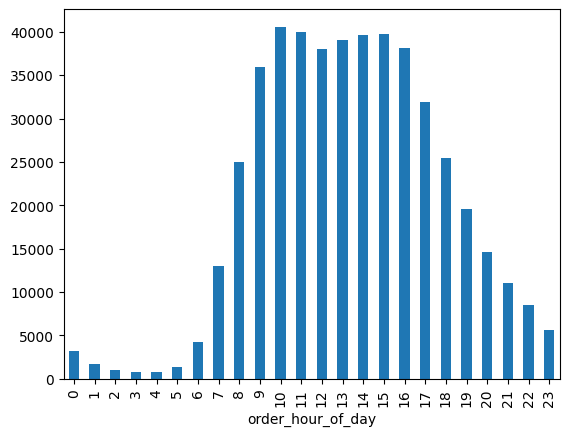

In [37]:
df_instacart_orders.groupby('order_hour_of_day')['user_id'].count().plot(kind='bar')
plt.show()

Escribe aquí tus conclusiones
- Nos damos cuenta que desde las 8 am hasta las 18 horas aprox, se dan las mayores ordenes por cliente.

### [A3] ¿Qué día de la semana compran víveres las personas?

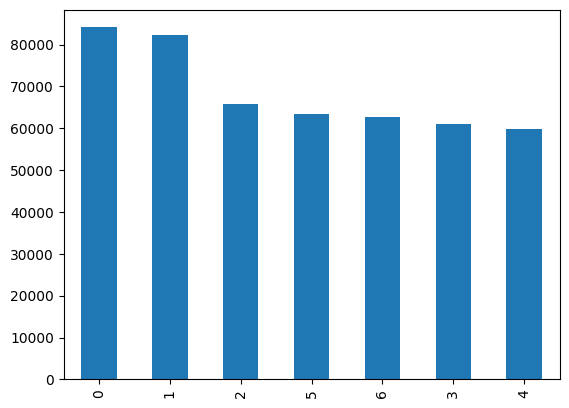

In [38]:
df_instacart_orders['order_dow'].value_counts().plot(kind='bar')
plt.show()

Escribe aquí tus conclusiones
- Las personas compran víveres todos los días y compran con mayor frecuencia el domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

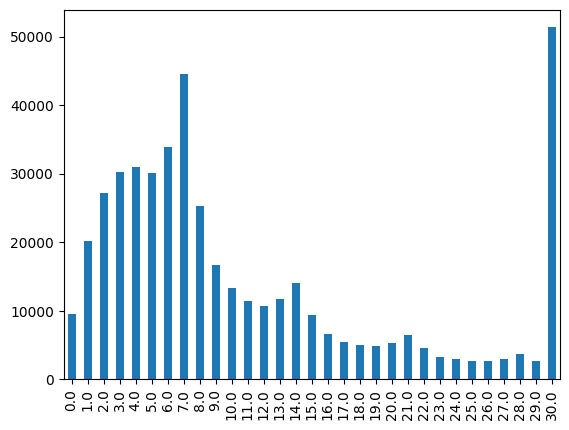

In [39]:
dias_para_nueva_compra=df_instacart_orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar')
plt.show()

Escribe aquí tus conclusiones
- La mayoría de las personas esperan 30 días para volvera  comprar y la minoría de las personas esperan 26 días para volver a comprar.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

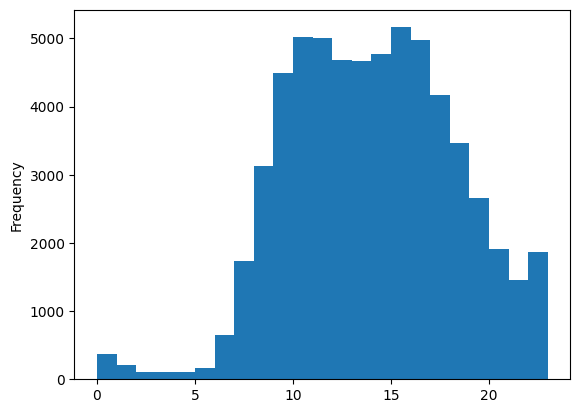

In [40]:
# Para el día miércoles
df_instacart_orders[df_instacart_orders['order_dow']==3]['order_hour_of_day'].sort_values().plot(
                                                                                    kind='hist',
                                                                                    bins=23)
plt.show()

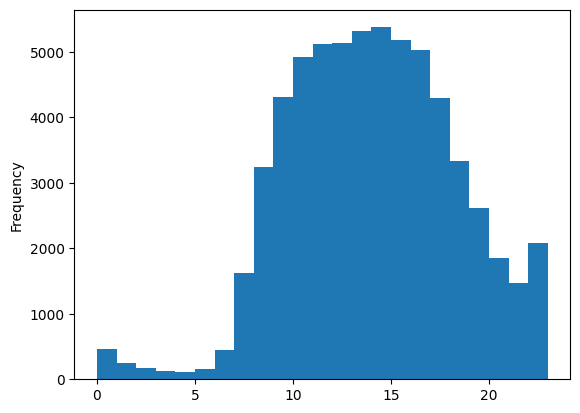

In [41]:
# Para el sábado
df_instacart_orders[df_instacart_orders['order_dow']==6]['order_hour_of_day'].sort_values().plot(
                                                                                    kind='hist',
                                                                                    bins=23)
plt.show()

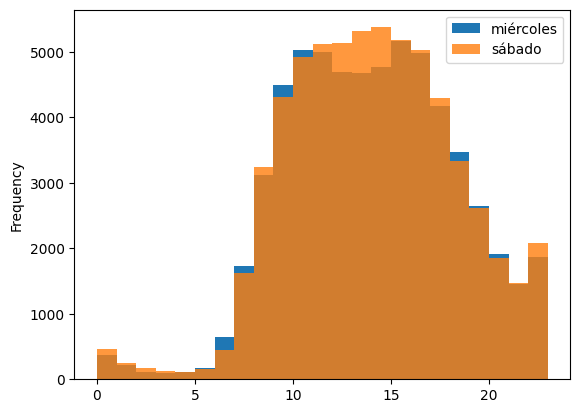

In [42]:
#miercoles
df_instacart_orders[df_instacart_orders['order_dow']==3]['order_hour_of_day'].sort_values().plot(
                                                                                    kind='hist',
                                                                                    bins=23)

#sabado
df_instacart_orders[df_instacart_orders['order_dow']==6]['order_hour_of_day'].sort_values().plot(
                                                                                    kind='hist',
                                                                                    bins=23,
                                                                                    alpha=0.8)

plt.legend(['miércoles','sábado'])
plt.show()


Escribe aquí tus conclusiones
- las conclusiones que se pueden obtener de ambos días (miércoles y sábado) sobre las horas de las órdenes en el día:
    - Que entre las 0 y 6 horas del día son donde no se registran muy pocas órdenes de pedidos. En cambio, entre las 8 y 19 horas es donde se presenta la mayor cantidad de ventas del día.
    - también, se aprecia en un nivel promedio la ventras desde a las 7 y desde las 20 horas hasta las 23 horas.
    _ Se muestra un pico de ventas desde las 10 hasta las 16 horas del día.
    - existe una leve diferencia siendo mayor el sábado entre las 12 y 14 horas del día

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

        user_id  order_number
0             2             2
1             4             2
2             5             1
3             6             2
4             7             2
...         ...           ...
157432   206203             1
157433   206206             7
157434   206207             5
157435   206208             9
157436   206209             2

[157437 rows x 2 columns]


(array([1.13411e+05, 2.82880e+04, 9.40900e+03, 2.95400e+03, 2.16300e+03, 8.84000e+02, 2.06000e+02, 9.70000e+01, 2.30000e+01, 2.00000e+00]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

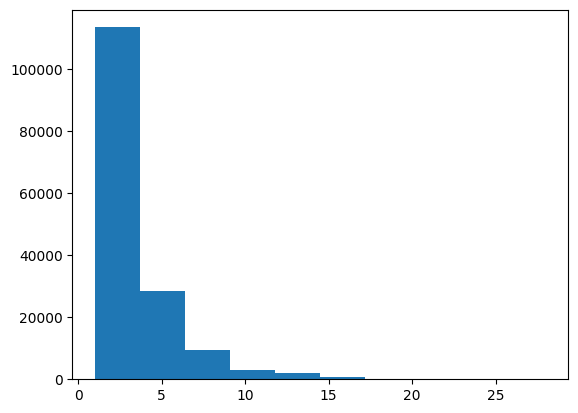

In [49]:
numero_pedidos=df_instacart_orders.groupby('user_id')['order_number'].count().reset_index()
print(numero_pedidos)

plt.hist(x=numero_pedidos['order_number'])

        user_id  order_number
0             2             2
1             4             2
2             5             1
3             6             2
4             7             2
...         ...           ...
157432   206203             1
157433   206206             7
157434   206207             5
157435   206208             9
157436   206209             2

[157437 rows x 2 columns]


(array([5.5355e+04, 3.6508e+04, 2.1548e+04, 1.3498e+04, 8.7780e+03, 6.0120e+03, 4.2400e+03, 3.0160e+03, 2.1530e+03, 1.6460e+03, 1.3080e+03, 9.4800e+02, 7.0100e+02, 5.1400e+02, 4.3700e+02, 2.6300e+02, 1.8400e+02, 1.2100e+02,
        8.5000e+01, 5.2000e+01, 2.2000e+01, 2.3000e+01, 1.9000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.]),
 <BarContainer object of 27 artists>)

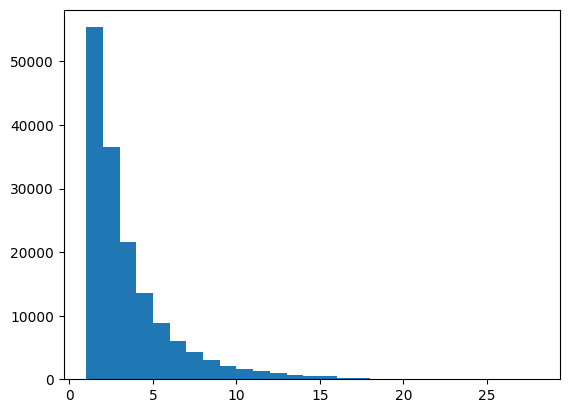

In [51]:
numero_pedidos=df_instacart_orders.groupby('user_id')['order_number'].count().reset_index()
print(numero_pedidos)

plt.hist(x=numero_pedidos['order_number'], bins=27)

Escribe aquí tus conclusiones
- Con el apoyo de los bins=, se puede notar que la gran mayoría de los clientes realizan 1 pedido con 55k aprox. Luego, 2 pedidos 36k, y así sucesivamente. También, se puede observar que menos de 10k personas realizan 5 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
order_id_merge_inner=df_order_products.merge(df_instacart_orders,on='order_id')

product_id_merge_inner=order_id_merge_inner.merge(df_products,on='product_id')

#se desea la columna order_number. eso me dará la cantidad de productois vendidos. primero se tiene que agrupar order_productos con instacart_orders para obtener el product_id
# y con eso entrar al df de products.

In [46]:
principales_productos=product_id_merge_inner.groupby(['product_id','product_name'])['order_number'].sum().sort_values(ascending=False)

In [47]:
principales_productos.head(20)

product_id  product_name                        
24852       BANANA                                  1139080
13176       BAG OF ORGANIC BANANAS                  1092779
21137       ORGANIC STRAWBERRIES                     654751
21903       ORGANIC BABY SPINACH                     596678
47209       ORGANIC HASS AVOCADO                     578619
27966       ORGANIC RASPBERRIES                      419889
47626       LARGE LEMON                              387927
27845       ORGANIC WHOLE MILK                       383646
47766       ORGANIC AVOCADO                          382329
16797       STRAWBERRIES                             351564
26209       LIMES                                    340114
22935       ORGANIC YELLOW ONION                     306632
45007       ORGANIC ZUCCHINI                         295180
24964       ORGANIC GARLIC                           278781
8277        APPLE HONEYCRISP ORGANIC                 274119
39275       ORGANIC BLUEBERRIES                    

Escribe aquí tus conclusiones
- Nos damos cuenta que la Banana encabeza la lista de los pedidos más populares con más de 1.1 millón de pedidos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
count_order_number=product_id_merge_inner.groupby('order_id')['product_name'].count() 
# se agrupa por la columna 'order_id' para luego obtener el valaor promedio por numeros de veces que ha realizado un pedido

In [49]:
print(count_order_number.median())

8.0


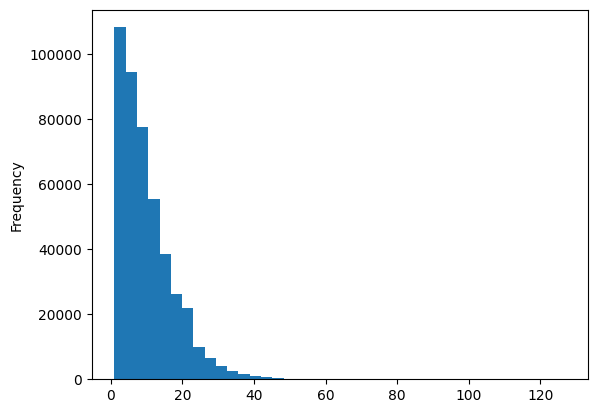

In [50]:
count_order_number.plot(kind='hist',bins=40, xlabel='cantidad de pedidos')
plt.show()

Escribe aquí tus conclusiones
- La mediana nos muestra que 8 es el artículo que tiene mayor frecuencia de compra. En la gráfica se puede apreciar que la distribución tiene a 0 desde los 20 productos comprados.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
products_reorder=product_id_merge_inner[product_id_merge_inner['reordered']==1].groupby(['product_id','product_name'])['order_number'].sum().sort_values(ascending=False)


In [52]:
products_reorder.head(20)

product_id  product_name                        
24852       BANANA                                  1087236
13176       BAG OF ORGANIC BANANAS                  1029608
21137       ORGANIC STRAWBERRIES                     599792
21903       ORGANIC BABY SPINACH                     546679
47209       ORGANIC HASS AVOCADO                     536018
27966       ORGANIC RASPBERRIES                      375155
27845       ORGANIC WHOLE MILK                       359453
47766       ORGANIC AVOCADO                          349811
47626       LARGE LEMON                              328314
16797       STRAWBERRIES                             298232
26209       LIMES                                    288272
22935       ORGANIC YELLOW ONION                     263316
45007       ORGANIC ZUCCHINI                         248653
24964       ORGANIC GARLIC                           242312
8277        APPLE HONEYCRISP ORGANIC                 241637
19057       ORGANIC LARGE EXTRA FANCY FUJI APPLE   

Escribe aquí tus conclusiones
- Nos damos cuenta que la banana es el producto que se pide con mayor frecuencia.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
pedido_recuento=product_id_merge_inner.groupby('product_name')['reordered'].agg(['count','sum']).reset_index()

In [54]:
pedido_recuento['proporcion']=pedido_recuento['sum']/pedido_recuento['count']

In [55]:
print(pedido_recuento)

                                            product_name  count  sum  \
0                                      #2 COFFEE FILTERS    110   28   
1                           #2 CONE WHITE COFFEE FILTERS      2    0   
2                                  #2 MECHANICAL PENCILS      3    0   
3                        #4 NATURAL BROWN COFFEE FILTERS     39   14   
4                 & GO! HAZELNUT SPREAD + PRETZEL STICKS     15    7   
...                                                  ...    ...  ...   
44513                            \"DARN GOOD\" CHILI MIX      5    2   
44514  \"IM PEI-NUT BUTTER\" DOUBLE CHOCOLATE COOKIE ...     20    8   
44515  \"LOUIS BA-KAHN\" CHOCOLATE CHIP COOKIE & BROW...      2    0   
44516               \"MIES VANILLA ROHE\" ICE CREAM BARS      8    4   
44517  \"MOKACCINO\" MILK + BLUE BOTTLE COFFEE CHOCOLATE     52   37   

       proporcion  
0        0.254545  
1        0.000000  
2        0.000000  
3        0.358974  
4        0.466667  
...           .

Escribe aquí tus conclusiones
- Nos damos cuenta que existen 0% de proporción hasta 71% de proporción de las veces que se pide y se vuelve a pedir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
cliente_recuento=product_id_merge_inner.groupby('user_id')['reordered'].agg(['count','sum']).reset_index()

In [57]:
cliente_recuento['proporcion_repetidos']=cliente_recuento['sum']/cliente_recuento['count']

print(cliente_recuento)

        user_id  count  sum  proporcion_repetidos
0             2     26    1              0.038462
1             4      2    0              0.000000
2             5     12    8              0.666667
3             6      4    0              0.000000
4             7     14   13              0.928571
...         ...    ...  ...                   ...
149621   206203     27    6              0.222222
149622   206206     21   15              0.714286
149623   206207     46   41              0.891304
149624   206208    125   87              0.696000
149625   206209     25    8              0.320000

[149626 rows x 4 columns]


Escribe aquí tus conclusiones
- De acuerdo con lo obtenido, existen clientes que vuelven a pedir los casi los mismos productos, es decir, con una proporción de 92% , 89% ,etc. Así como otros, que no vuelven a pedir lo mismo.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [58]:
principales_artículos=product_id_merge_inner[product_id_merge_inner['add_to_cart_order']==1].groupby('product_name')

In [59]:
principales_artículos['product_id'].count().sort_values(ascending=False).head(20)

product_name
BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
ORGANIC YELLOW ONION            1246
Name: product_id, dtype: int64

Escribe aquí tus conclusiones
- Podemos observar que la banana es el artículo que los clientes ponen en sus carritos y le sigue el bag de bananas orgánicas.

### Conclusion general del proyecto:

In [60]:
# - las bananas son productos más pedidos por los clientes.
# - Los usuarios compran con mayor frecuencia 8 pedidos en el carrito de compras.
# - las districiones de compra entre los días miercoles y sábado son similares
# - las horas de mayor afluencia de usuarios para la compra corresponde entre las 8 y 19 horas día para los días miercoles y sábados.
# - Existen varios productos que se vuelven a pedir con una proporcion de hasta más de 90%.
# - Existe un departamento y un pasillo ausente que no se está definido